<a href="https://colab.research.google.com/github/plaban1981/TMLC/blob/main/Patient_Survival_Detection_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Dataset.csv"

## Import Required Libraries

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Bias is a certain assumption of each and every layer
* Main aim here in Neural Network is to abe able to learn about proper weights associated with each features.






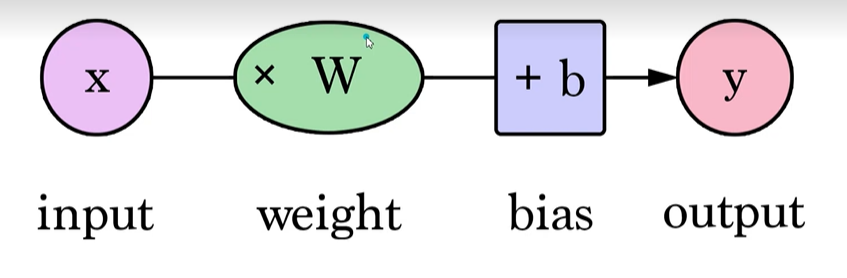

## 🩺 Project 1: Patient Survival Prediction

## 🧾**Description:** 

Getting a rapid understanding of the context of a patient’s overall health has been particularly important during the COVID-19 pandemic as healthcare workers around the world struggle with hospitals overloaded by patients in critical condition. Intensive Care Units (ICUs) often lack verified medical histories for incoming patients. A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system. Knowledge about chronic conditions can inform clinical decisions about patient care and ultimately improve patient's survival outcomes.

source of dataset - https://journals.lww.com/ccmjournal/Citation/2019/01001/33__THE_GLOBAL_OPEN_SOURCE_SEVERITY_OF_ILLNESS.36.aspx

## 🧭 Problem Statement: 

* The target feature is **hospital_death** which is a binary variable. 

* The task is to classify this variable based on the other 84 features step-by-step by going through each day's task. 

##Scoring Metric
* Accuracy/Area under ROC curve.

## Read the data

In [ ]:
df = pd.read_csv(file_path)
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## Data Summary

In [ ]:
df.shape

(91713, 186)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


## Check for Null Values

In [ ]:
missing_values = df.isnull().sum()[df.isnull().sum() > 0].to_dict()

In [ ]:
missing_values_percent = (df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0] *100.0).to_dict()

In [ ]:
cols_missing_ge_75 = []
for k,v in missing_values_percent.items():
  if v >= 75.0:
    cols_missing_ge_75.append(k)

## Analyze Columns having > 75% missing Values

In [ ]:
for col in cols_missing_ge_75:
  print(f'% missing values associated with {col} column : {missing_values_percent[col]}')

% missing values associated with fio2_apache column : 77.27148822958577
% missing values associated with paco2_apache column : 77.27148822958577
% missing values associated with paco2_for_ph_apache column : 77.27148822958577
% missing values associated with pao2_apache column : 77.27148822958577
% missing values associated with ph_apache column : 77.27148822958577
% missing values associated with h1_diasbp_invasive_max column : 81.69834156553597
% missing values associated with h1_diasbp_invasive_min column : 81.69834156553597
% missing values associated with h1_mbp_invasive_max column : 81.60675149651631
% missing values associated with h1_mbp_invasive_min column : 81.60675149651631
% missing values associated with h1_sysbp_invasive_max column : 81.68416691199721
% missing values associated with h1_sysbp_invasive_min column : 81.68416691199721
% missing values associated with h1_albumin_max column : 91.39816601790368
% missing values associated with h1_albumin_min column : 91.39816601

## Dropping Columns which have >75 % missing Values

In [ ]:
new_df = df.copy()
new_df = new_df.drop(cols_missing_ge_75,axis=1)

In [ ]:
new_df.shape,df.shape

((91713, 141), (91713, 186))

## Analyze Categorical columns

In [ ]:
cat_cols = new_df.select_dtypes(include='object').columns

In [ ]:
cat_cols

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [ ]:
for col in cat_cols:
  print(col)
  print("="*80)
  print(f"Unique Values : {df[col].unique()}")
  print("="*80)
  print(f"value counts :\n{df[col].value_counts(normalize=True,dropna=False)}")
  print("\n")

ethnicity
Unique Values : ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
value counts :
Caucasian           0.770709
African American    0.104096
Other/Unknown       0.047692
Hispanic            0.041390
NaN                 0.015210
Asian               0.012310
Native American     0.008592
Name: ethnicity, dtype: float64


gender
Unique Values : ['M' 'F' nan]
value counts :
M      0.539389
F      0.460338
NaN    0.000273
Name: gender, dtype: float64


hospital_admit_source
Unique Values : ['Floor' 'Emergency Department' 'Operating Room' nan 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other']
value counts :
Emergency Department    0.403018
NaN                     0.233435
Operating Room          0.106713
Floor                   0.087828
Direct Admit            0.070230
Recovery Room           0.031577
Acute Care/Floor      

## Imputing missing categorical columns

In [ ]:
for col in cat_cols:
  new_df[col] = new_df[col].fillna('missing')

## Check if missing values in the categorical columns have been imputed

In [ ]:
new_df[cat_cols].isnull().sum()[new_df[cat_cols].isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
numeric_missing = (new_df.isnull().sum()[new_df.isnull().sum() > 0]/new_df.shape[0] * 100).to_dict()

In [ ]:
numeric_missing_ge_50 = [k for k,v in numeric_missing .items() if v >= 50.0]

In [ ]:
numeric_missing_ge_50

['albumin_apache',
 'bilirubin_apache',
 'urineoutput_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_inr_max',
 'h1_inr_min',
 'd1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min']

## Dropping numeric Columns having ge 50 % missing values

In [ ]:
new_df = new_df.drop(numeric_missing_ge_50,axis=1)
new_df.shape

(91713, 112)

In [ ]:
null_cols = [col for col in new_df.isnull().sum()[new_df.isnull().sum() > 0].to_dict().keys()]

In [ ]:
null_cols

['age',
 'bmi',
 'height',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 '

In [ ]:
new_df = new_df[~ (new_df['gender'] == 'missing')]

In [ ]:
new_df.shape

(91688, 112)

In [ ]:
new_df['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
new_df[(new_df['solid_tumor_with_metastasis'].isnull()) & (new_df['gender'] == 'F')]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
350,87626,122044,118,0,NaN,44.969557,0,Caucasian,F,154.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
968,99457,58952,118,0,NaN,NaN,0,Caucasian,F,162.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
1104,64313,74279,118,0,NaN,24.457311,0,African American,F,167.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
1660,121671,15927,77,0,NaN,45.050978,0,Caucasian,F,165.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
1964,53121,63323,118,0,NaN,24.946795,0,Caucasian,F,165.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91499,128966,73267,183,0,NaN,26.485540,0,Caucasian,F,153.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
91567,43987,67116,184,0,NaN,41.815650,0,Caucasian,F,163.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
91597,22339,90132,183,1,NaN,30.470522,0,Caucasian,F,168.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
91625,49553,18923,6,0,NaN,21.947625,0,Caucasian,F,157.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing


In [ ]:
male_df = new_df[(new_df['gender'] == 'F')]
female_df = new_df[(new_df['gender'] == 'M')]
for col in null_cols:
  male_df[col] = male_df[col].fillna(male_df[col].mean())
  female_df[col] = female_df[col].fillna(female_df[col].mean())
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
female_df[(female_df['solid_tumor_with_metastasis'].isnull()) & (female_df['gender'] == 'M')]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem


In [ ]:
final_df = pd.concat([male_df,female_df],axis=0)

In [ ]:
final_df.shape

(91688, 112)

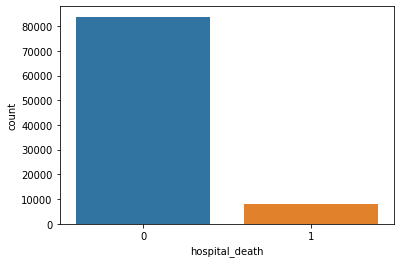

In [ ]:
sns.countplot(x='hospital_death',data=final_df)
plt.show()

* Dataset is imbalanced

In [ ]:
final_df.isnull().sum()[final_df.isnull().sum() > 0]

Series([], dtype: int64)

* All Null values have been imputed

## Save the processed datasets

In [ ]:
file_path

'/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Dataset.csv'

In [ ]:
final_df.to_csv("/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Processed_Dataset.csv",index=False)

In [33]:
final_df = pd.read_csv("/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Processed_Dataset.csv")

In [34]:
final_df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
1,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
2,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,82208,49526,83,0,59.0,57.450000,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
4,105427,125898,77,0,72.0,28.257052,1,Hispanic,F,154.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory


## Label Encoding

In [35]:
final_df.select_dtypes(include='object')

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
1,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
2,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
3,Caucasian,F,Operating Room,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory
4,Hispanic,F,Operating Room,Operating Room / Recovery,admit,Med-Surg ICU,Respiratory,Respiratory
...,...,...,...,...,...,...,...,...
91683,Caucasian,M,Direct Admit,Accident & Emergency,admit,Cardiac ICU,Metabolic,Metabolic
91684,African American,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91685,Native American,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
91686,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91688 entries, 0 to 91687
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 78.3+ MB


In [36]:
cat_cols = final_df.select_dtypes(include='object').columns

In [9]:
cat_cols

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [39]:
float_cols = final_df.select_dtypes(include='float64').columns
num_cols = final_df.select_dtypes(include='int64').columns

In [32]:
 for col in cat_cols:
  print(f"{col} : \n {final_df[col].unique()}\n")

ethnicity : 
 ['Caucasian' 'Hispanic' 'missing' 'African American' 'Asian'
 'Native American' 'Other/Unknown']

gender : 
 ['F' 'M']

hospital_admit_source : 
 ['Floor' 'Emergency Department' 'Operating Room' 'missing' 'Direct Admit'
 'Other Hospital' 'ICU to SDU' 'Recovery Room' 'Chest Pain Center'
 'Other ICU' 'Step-Down Unit (SDU)' 'PACU' 'Acute Care/Floor' 'ICU'
 'Other' 'Observation']

icu_admit_source : 
 ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' 'missing']

icu_stay_type : 
 ['admit' 'transfer' 'readmit']

icu_type : 
 ['Med-Surg ICU' 'CTICU' 'MICU' 'CCU-CTICU' 'SICU' 'Neuro ICU'
 'Cardiac ICU' 'CSICU']

apache_3j_bodysystem : 
 ['Respiratory' 'Metabolic' 'Cardiovascular' 'Neurological' 'Sepsis'
 'Genitourinary' 'Gastrointestinal' 'Trauma' 'Musculoskeletal/Skin'
 'missing' 'Hematological' 'Gynecological']

apache_2_bodysystem : 
 ['Respiratory' 'Metabolic' 'Cardiovascular' 'Neurologic'
 'Renal/Genitourinary' 'Gastrointestinal' 'Tra

In [40]:
 for col in float_cols:
  print(f"{col} : \n max : {final_df[col].max()} min : {final_df[col].min()} \n")

age : 
 max : 89.0 min : 16.0 

bmi : 
 max : 67.81498973 min : 14.84492591 

height : 
 max : 195.59 min : 137.2 

pre_icu_los_days : 
 max : 159.0909722 min : -24.94722222 

weight : 
 max : 186.0 min : 38.6 

apache_2_diagnosis : 
 max : 308.0 min : 101.0 

apache_3j_diagnosis : 
 max : 2201.05 min : 0.01 

arf_apache : 
 max : 1.0 min : 0.0 

bun_apache : 
 max : 127.0 min : 4.0 

creatinine_apache : 
 max : 11.18 min : 0.3 

gcs_eyes_apache : 
 max : 4.0 min : 1.0 

gcs_motor_apache : 
 max : 6.0 min : 1.0 

gcs_unable_apache : 
 max : 1.0 min : 0.0 

gcs_verbal_apache : 
 max : 5.0 min : 1.0 

glucose_apache : 
 max : 598.7 min : 39.0 

heart_rate_apache : 
 max : 178.0 min : 30.0 

hematocrit_apache : 
 max : 51.4 min : 16.2 

intubated_apache : 
 max : 1.0 min : 0.0 

map_apache : 
 max : 200.0 min : 40.0 

resprate_apache : 
 max : 60.0 min : 4.0 

sodium_apache : 
 max : 158.0 min : 117.0 

temp_apache : 
 max : 39.7 min : 32.1 

ventilated_apache : 
 max : 1.0 min : 0.0 

wb

In [41]:
for col in num_cols:
  print(f"{col} : \n max : {final_df[col].max()} min : {final_df[col].min()} \n")

encounter_id : 
 max : 131051 min : 1 

patient_id : 
 max : 131051 min : 1 

hospital_id : 
 max : 204 min : 2 

hospital_death : 
 max : 1 min : 0 

elective_surgery : 
 max : 1 min : 0 

icu_id : 
 max : 927 min : 82 

readmission_status : 
 max : 0 min : 0 

apache_post_operative : 
 max : 1 min : 0 



In [42]:
final_df.shape

(91688, 112)

In [15]:
final_df['patient_id'].nunique()

91688

In [44]:
all_unique_cols = [col for col in final_df.columns if final_df[col].nunique() == len(final_df)]

In [45]:
all_unique_cols

['encounter_id', 'patient_id']

## drop the columns having all data unique

In [46]:
final_df = final_df.drop(all_unique_cols,axis=1)

In [47]:
final_df.shape

(91688, 110)

In [48]:
df_dummies = pd.get_dummies(final_df[cat_cols])

In [49]:
df_dummies

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,ethnicity_missing,gender_F,gender_M,hospital_admit_source_Acute Care/Floor,...,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,apache_2_bodysystem_missing
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91683,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
91684,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
91685,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
91686,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
final_df = pd.concat([df_dummies,final_df],axis=1)

In [51]:
final_df.head()

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,ethnicity_missing,gender_F,gender_M,hospital_admit_source_Acute Care/Floor,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
1,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
2,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
4,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory


In [52]:
train_df = final_df.drop(cat_cols,axis=1)

In [53]:
train_df.shape

(91688, 167)

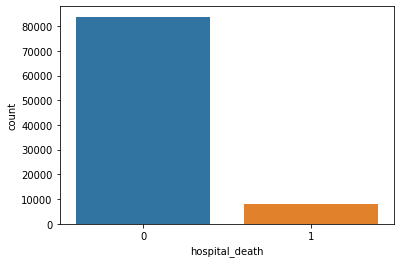

In [56]:
sns.countplot(x='hospital_death',data=train_df)
plt.show()

## shuffle the DataFrame rows


In [58]:
train_df = train_df.sample(frac = 1) # frac determines what fraction of total instances need to be returned.

In [59]:
train_df['hospital_death'].head()

40815    0
4882     0
16547    0
5782     0
1289     0
Name: hospital_death, dtype: int64

## Train Test Split

In [60]:
from sklearn.model_selection import train_test_split
X = train_df.drop('hospital_death',axis=1)
y = train_df['hospital_death']

In [61]:
final_features = X.columns

In [63]:
with open('features.txt','w') as f:
  f.write(final_features)

Index(['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian',
       'ethnicity_Hispanic', 'ethnicity_Native American',
       'ethnicity_Other/Unknown', 'ethnicity_missing', 'gender_F', 'gender_M',
       'hospital_admit_source_Acute Care/Floor',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=166)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [64]:
np.unique(y_train)

array([0, 1])

In [65]:
np.unique(y_test)

array([0, 1])

## Normalize the data

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [67]:
X_train_scaled.shape,X_test_scaled.shape

((73350, 166), (18338, 166))

## Import Keras packages

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape,X_test.shape

((73350, 168), (18338, 168))

## Analyze class imbalance

In [69]:
counts = np.bincount(y_train)

In [70]:
print(f"Number of samples having 1 as the traget in the training sample {counts[1]} ({100.0 *(counts[1]/len(X_train))} % of total)")

Number of samples having 1 as the traget in the training sample 6326 (8.624403544648944 % of total)


In [71]:
weight_0 = 1.0 /counts[0]
weight_1 = 1.0 /counts[1]
print(weight_0,weight_1)

1.4920028646455001e-05 0.00015807777426493836


## KerasEvaluation Metrics

In [82]:
metrics = ['accuracy',
           keras.metrics.FalseNegatives(name="fn"),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.TruePositives(name='tp'),
           keras.metrics.Precision(name="precision"),
           keras.metrics.Recall(name="recall")]

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Define the Artificial Neural Network

In [132]:
def create_model():
  model = Sequential()
  model.add(Dense(256, input_dim=166, activation= 'relu' ))
  model.add(Dense(256, activation= 'relu'))
  model.add(Dropout(0.3)),
  model.add(Dense(256,  activation= 'relu' ))
  model.add(Dropout(0.3)),
  model.add(Dense(1,  activation= 'sigmoid' ))
  #compile the model 
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
  return model

## Build the model

In [84]:
model = create_model()

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               42752     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 174,593
Trainable params: 174,593
Non-tr

## Train and Evaluate the Model

In [86]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=30, batch_size=32,class_weight={0:weight_0,1:weight_1})

Epoch 1/30
2293/2293 [==============================] - 17s 6ms/step - loss: 1.2699e-05 - accuracy: 0.7599 - fn: 1277.0000 - fp: 16334.0000 - tn: 50690.0000 - tp: 5049.0000 - precision: 0.2361 - recall: 0.7981 - val_loss: 0.5179 - val_accuracy: 0.7359 - val_fn: 209.0000 - val_fp: 4634.0000 - val_tn: 12123.0000 - val_tp: 1372.0000 - val_precision: 0.2284 - val_recall: 0.8678
Epoch 2/30
2293/2293 [==============================] - 12s 5ms/step - loss: 1.1552e-05 - accuracy: 0.7847 - fn: 1060.0000 - fp: 14732.0000 - tn: 52292.0000 - tp: 5266.0000 - precision: 0.2633 - recall: 0.8324 - val_loss: 0.4065 - val_accuracy: 0.7920 - val_fn: 290.0000 - val_fp: 3525.0000 - val_tn: 13232.0000 - val_tp: 1291.0000 - val_precision: 0.2681 - val_recall: 0.8166
Epoch 3/30
2293/2293 [==============================] - 12s 5ms/step - loss: 1.1090e-05 - accuracy: 0.7930 - fn: 1011.0000 - fp: 14176.0000 - tn: 52848.0000 - tp: 5315.0000 - precision: 0.2727 - recall: 0.8402 - val_loss: 0.3937 - val_accuracy: 0

## Saving the base model

In [87]:
model.save("/content/drive/MyDrive/TMLC/Patient_Survival_Detection/keras_base_model.h5")

## Loading the saved model

In [88]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/TMLC/Patient_Survival_Detection/keras_base_model.h5")

## Training and Validation Accuracy Visualization


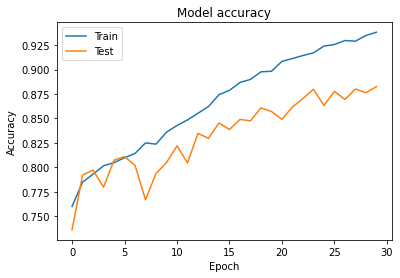

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

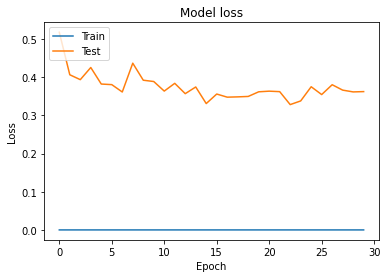

In [90]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

287/287 [==============================] - 0s 1ms/step


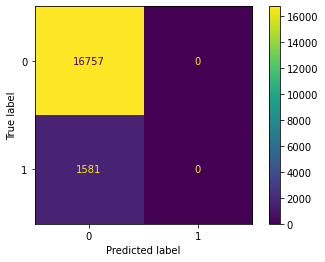

In [91]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_bool)

## Hyperparameter Tuning with KerasTuner with different optimization methods

https://towardsdatascience.com/hyperparameter-tuning-with-keras-tuner-283474fbfbe

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 9.1 MB/s 


In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers
from keras_tuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
class ClassificationHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Choice('units1', [8,16,32,64,128,256]),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        model.add(
            layers.Dense(
                units=hp.Choice('units2', [8,16,32,64,128,256]),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout1',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        model.add(
            layers.Dense(
                units=hp.Choice('units3', [8,16,32,64,128,256]),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout2',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(layers.Dense(1))
        
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
        #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
        
        return model

In [ ]:
input_shape = (X_train.shape[1],)
hypermodel = ClassificationHyperModel(input_shape)

## Random Search

In [ ]:
tuner_rs = RandomSearch(
            hypermodel,
            objective='val_accuracy',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [ ]:
tuner_rs.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled,y_test), verbose=2)

Trial 10 Complete [00h 02m 44s]
val_accuracy: 0.9257552623748779

Best val_accuracy So Far: 0.9274730086326599
Total elapsed time: 00h 33m 40s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner_rs.get_best_models(num_models=1)[0]

In [ ]:
best_model.evaluate(X_test_scaled, y_test)

574/574 [==============================] - 2s 3ms/step - loss: 0.4081 - accuracy: 0.9281 - f1_m: 0.3377 - precision_m: 0.4894 - recall_m: 0.2861


[0.4080633819103241,
 0.9281274080276489,
 0.33768096566200256,
 0.48943087458610535,
 0.2861165702342987]

In [ ]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
loss, acc,f1_score,precision,recall = best_model.evaluate(X_test_scaled, y_test)

574/574 [==============================] - 2s 3ms/step - loss: 0.4081 - accuracy: 0.9281 - f1_m: 0.3377 - precision_m: 0.4894 - recall_m: 0.2861


In [ ]:
loss, acc,f1_score,precision,recall

(0.4080633819103241,
 0.9281274080276489,
 0.33768096566200256,
 0.48943087458610535,
 0.2861165702342987)

In [ ]:
best_hyperparameters_rs = tuner_rs.get_best_hyperparameters(1)[0]

In [ ]:
best_hyperparameters_rs.get('units1')

256

In [ ]:
best_hyperparameters_rs.get('units2')

64

In [ ]:
best_hyperparameters_rs.get('units3')

8

In [ ]:
best_hyperparameters_rs.get('dropout1')

0.03

In [ ]:
best_hyperparameters_rs.get('dropout2')

0.04

In [ ]:
best_hyperparameters_rs.get('dense_activation')

'relu'

## Train the model using best hyper parameters
* Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [ ]:
model = tuner_rs.hypermodel.build(best_hyperparameters_rs)

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=100, batch_size=32)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
2293/2293 [==============================] - 10s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
2293/2293 [==============================] - 10s 5ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
2293/2293 [==============================] - 9s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
2293/2293 [==============================] - 10s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e

* Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [ ]:
hypermodel = tuner_rs.hypermodel.build(best_hyperparameters_rs)

# Retrain the model
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=best_epoch , batch_size=32,class_weight={0:weight_0,1:weight_1})

2293/2293 [==============================] - 12s 5ms/step - loss: 2.1029e-04 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00


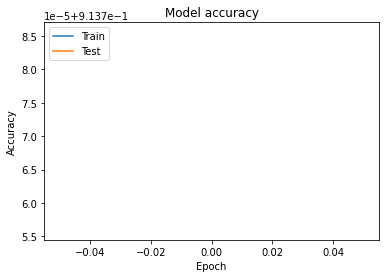

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

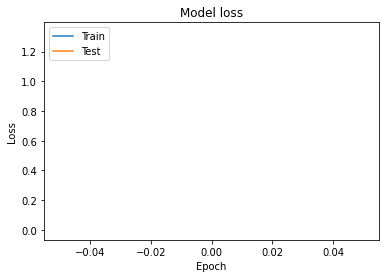

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

##  Evaluate the hypermodel on the test data.

In [ ]:
eval_result = hypermodel.evaluate(X_test_scaled,y_test)

574/574 [==============================] - 2s 3ms/step - loss: 0.6492 - accuracy: 0.8140 - f1_m: 0.1570 - precision_m: 0.1412 - recall_m: 0.2300


In [ ]:
eval_result

[0.6492352485656738,
 0.8139927983283997,
 0.1569555401802063,
 0.1412084549665451,
 0.23000465333461761]

In [ ]:
pred = hypermodel.predict(X_test_scaled)

In [ ]:
predictions = np.argmax(pred,axis=1)

In [ ]:
np.unique(predictions)

array([0])

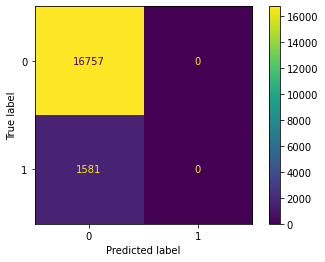

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,predictions)

## Build, Run and Evaluate Hyperband Tuner

In [ ]:
input_shape = (X_train.shape[1],)
hypermodel = ClassificationHyperModel(input_shape)

In [ ]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=5,
            objective='val_accuracy',
            seed=42,
            executions_per_trial=2,
            directory='hb'
        )

tuner_hb.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled,y_test), verbose=0)

INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner_hb.get_best_models(num_models=1)[0]

In [ ]:
hb_loss,hb_acc,hb_f1,hb_pre,hb_rec = best_model.evaluate(X_test_scaled,y_test)

574/574 [==============================] - 2s 3ms/step - loss: 0.2466 - accuracy: 0.9259 - f1_m: 0.3324 - precision_m: 0.4724 - recall_m: 0.2849


In [ ]:
hb_loss,hb_acc,hb_f1,hb_pre,hb_rec

(0.2465725988149643,
 0.9259461164474487,
 0.3323687016963959,
 0.4724448621273041,
 0.28485560417175293)

In [ ]:
best_hyperparameters = tuner_hb.get_best_hyperparameters(1)[0]

In [ ]:
best_hyperparameters.get('units1'),best_hyperparameters.get('units2'),best_hyperparameters.get('units3')

(8, 256, 8)

In [ ]:
best_hyperparameters.get('dense_activation')

'relu'

In [ ]:
best_hyperparameters.get('dropout1'),best_hyperparameters.get('dropout2')

(0.07, 0.03)

In [ ]:
model = tuner_hb.hypermodel.build(best_hyperparameters)

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=25, batch_size=32)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/25
2293/2293 [==============================] - 10s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/25
2293/2293 [==============================] - 9s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/25
2293/2293 [==============================] - 9s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/25
2293/2293 [==============================] - 9s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - 

In [ ]:
hypermodel = tuner_rs.hypermodel.build(best_hyperparameters)

# Retrain the model
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=best_epoch , batch_size=32)

2293/2293 [==============================] - 10s 4ms/step - loss: 1.3303 - accuracy: 0.9138 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3299 - val_accuracy: 0.9138 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00


In [ ]:
pred = hypermodel.predict(X_test_scaled)

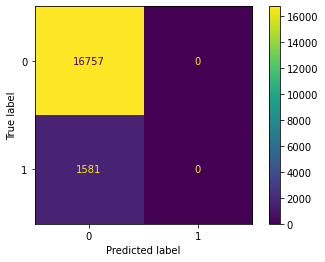

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,predictions)

## Build, Run and Evaluate Bayesian Optimization Tuner

In [ ]:
input_shape = (X_train.shape[1],)
hypermodel = ClassificationHyperModel(input_shape)

In [ ]:
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='bo'
        )

INFO:tensorflow:Reloading Oracle from existing project bo/untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project bo/untitled_project/oracle.json


In [ ]:
tuner_bo.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled,y_test), verbose=1)

Trial 10 Complete [00h 03m 49s]
val_accuracy: 0.9189388155937195

Best val_accuracy So Far: 0.9255643784999847
Total elapsed time: 00h 42m 29s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(X_test_scaled, y_test)[1]

574/574 [==============================] - 2s 3ms/step - loss: 0.2071 - accuracy: 0.9263 - f1_m: 0.3157 - precision_m: 0.4654 - recall_m: 0.2695


0.9262732863426208

In [ ]:
best_hyperparameters_bo = tuner_bo.get_best_hyperparameters(1)[0]

In [ ]:
best_hyperparameters_bo.get('units')

8

In [ ]:
best_hyperparameters_bo.get('dropout')

0.1

In [ ]:
best_hyperparameters_bo.get('dense_activation')

'relu'

## How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

https://www.adriangb.com/scikeras/stable/migration.html

In [92]:
!pip install --quiet scikeras[tensorflow]

     |████████████████████████████████| 462 kB 12.2 MB/s 
     |████████████████████████████████| 97 kB 8.2 MB/s 


In [93]:
from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

## Tune Batch Size and Number of Epochs

In [94]:
# create model
model = KerasClassifier(model=create_model, verbose=0)

In [105]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('scaler', sc),('clf', model )])
# define the grid search parameters
batch_size = [20, 40, 60, 80, 100]
epochs = [ 30,50]
param_grid = dict(clf__batch_size=batch_size, clf__epochs=epochs,clf__class_weight=[{0:weight_0,1:weight_1}])

In [106]:
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=5,scoring="f1")

In [107]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        KerasClassifier(model=<function create_model at 0x7f58921e8440>, verbose=0))]),
             n_jobs=-1,
             param_grid={'clf__batch_size': [20, 40, 60, 80, 100],
                         'clf__class_weight': [{0: 1.4920028646455001e-05,
                                                1: 0.00015807777426493836}],
                         'clf__epochs': [30, 50]},
             scoring='f1')

In [108]:
# summarize results
print(f"Best: {grid.best_score_} using {grid.best_params_}")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.4545658283933959 using {'clf__batch_size': 40, 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__epochs': 30}
0.445649 (0.001675) with: {'clf__batch_size': 20, 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__epochs': 30}
0.439373 (0.005340) with: {'clf__batch_size': 20, 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__epochs': 50}
0.454566 (0.008708) with: {'clf__batch_size': 40, 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__epochs': 30}
0.445697 (0.011479) with: {'clf__batch_size': 40, 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__epochs': 50}
0.449635 (0.006051) with: {'clf__batch_size': 60, 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__epochs': 30}
0.449355 (0.007780) with: {'clf__batch_size': 60, 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.000158077774264

In [109]:
grid.best_params_

{'clf__batch_size': 40,
 'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836},
 'clf__epochs': 30}

## Tune the Training Optimization Algorithm

In [110]:
# create model
model = KerasClassifier(model=create_model, epochs=30 , batch_size=40, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(clf__optimizer=optimizer,clf__class_weight=[{0:weight_0,1:weight_1}])
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=5,scoring="f1")
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [111]:
# summarize results
print(f"Best: {grid.best_score_} using {grid.best_params_}")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.4059628730953957 using {'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__optimizer': 'Adam'}
0.389114 (0.013864) with: {'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__optimizer': 'SGD'}
0.393535 (0.008543) with: {'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__optimizer': 'RMSprop'}
0.379966 (0.011925) with: {'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__optimizer': 'Adagrad'}
0.383805 (0.018870) with: {'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__optimizer': 'Adadelta'}
0.405963 (0.013210) with: {'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__optimizer': 'Adam'}
0.392316 (0.017738) with: {'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836}, 'clf__optimizer': 'Adamax'}
0.386157 (0.022152) with: {'clf__class_weight': {0: 1.4920028646455001e-05

In [112]:
grid.best_params_

{'clf__class_weight': {0: 1.4920028646455001e-05, 1: 0.00015807777426493836},
 'clf__optimizer': 'Adam'}

## Applying Best parameters

In [133]:
def create_model():
  model = Sequential()
  model.add(Dense(256, input_dim=166, activation= 'relu' ))
  model.add(Dense(64, activation= 'relu'))
  model.add(Dropout(0.03)),
  model.add(Dense(8,  activation= 'relu' ))
  model.add(Dropout(0.04)),
  model.add(Dense(1,  activation= 'sigmoid' ))
  #compile the model 
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
  return model

In [134]:
model = create_model()
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=30, batch_size=40,class_weight={0:weight_0,1:weight_1})

Epoch 1/30
1834/1834 [==============================] - 14s 7ms/step - loss: 1.2632e-05 - accuracy: 0.7707 - fn: 2736.0000 - fp: 36115.0000 - tn: 164957.0000 - tp: 16242.0000 - precision: 0.3102 - recall: 0.8558 - val_loss: 0.4716 - val_accuracy: 0.7736 - val_fn: 265.0000 - val_fp: 3886.0000 - val_tn: 12871.0000 - val_tp: 1316.0000 - val_precision: 0.2530 - val_recall: 0.8324
Epoch 2/30
1834/1834 [==============================] - 10s 6ms/step - loss: 1.1362e-05 - accuracy: 0.7993 - fn: 1120.0000 - fp: 13604.0000 - tn: 53420.0000 - tp: 5206.0000 - precision: 0.2768 - recall: 0.8230 - val_loss: 0.3971 - val_accuracy: 0.8136 - val_fn: 331.0000 - val_fp: 3088.0000 - val_tn: 13669.0000 - val_tp: 1250.0000 - val_precision: 0.2882 - val_recall: 0.7906
Epoch 3/30
1834/1834 [==============================] - 10s 6ms/step - loss: 1.0806e-05 - accuracy: 0.8049 - fn: 1045.0000 - fp: 13264.0000 - tn: 53760.0000 - tp: 5281.0000 - precision: 0.2848 - recall: 0.8348 - val_loss: 0.3912 - val_accuracy:

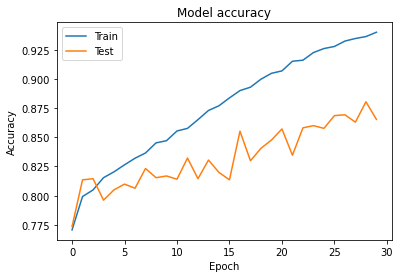

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

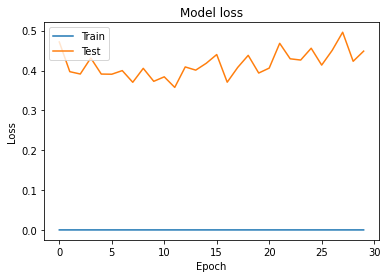

In [136]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

287/287 [==============================] - 1s 2ms/step
[[2.5286375e-12]
 [2.2401635e-05]
 [1.0709365e-04]
 ...
 [9.4296044e-01]
 [9.8821253e-01]
 [1.9678760e-04]]


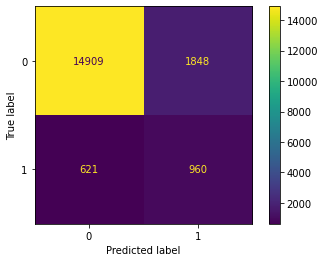

In [139]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled, batch_size=64, verbose=1)
print(y_pred)
y_pred_bool = []
for p in y_pred:
  if p[0] >=0.5:
    y_pred_bool.append(1)
  else:
    y_pred_bool.append(0)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_bool)

In [140]:
print(classification_report(y_test,y_pred_bool))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     16757
           1       0.34      0.61      0.44      1581

    accuracy                           0.87     18338
   macro avg       0.65      0.75      0.68     18338
weighted avg       0.91      0.87      0.88     18338



## Save the final_model

In [141]:
model.save("/content/drive/MyDrive/TMLC/Patient_Survival_Detection/keras_final_model.h5")